In [8]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the image and corresponding annotation file
img_path = "./images/val/000000410510.jpg"
ann_path = "./labels/val/000000410510.txt"

img = cv2.imread(img_path)
with open(ann_path, "r") as f:
    lines = f.readlines()

In [20]:
# Parse the annotation file
boxes = []
keypoints = []

# Should only have one line, but why not
for line in lines:
    parts = line.strip().split(" ")

    # Bounding box
    x_center = float(parts[1])
    y_center = float(parts[2])
    width = float(parts[3])
    height = float(parts[4])
    x_min = int((x_center - width/2) * img.shape[1])
    y_min = int((y_center - height/2) * img.shape[0])
    x_max = int((x_center + width/2) * img.shape[1])
    y_max = int((y_center + height/2) * img.shape[0])
    boxes.append((x_min, y_min, x_max, y_max))

    # COCO keypoints
    num_keypoints = (len(parts)-5) // 3
    keypoints.append(np.array([float(p) for p in parts[5:]]).reshape(num_keypoints, 3))

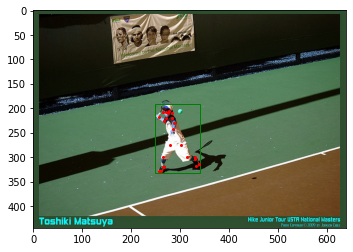

In [21]:
# Draw the boxes and keypoints on the image
fig, ax = plt.subplots()
ax.imshow(img)
for box in boxes:
    rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
for kps in keypoints:
    for i, kp in enumerate(kps):
        x = int(kp[0] * img.shape[1])
        y = int(kp[1] * img.shape[0])
        ax.plot(x, y, 'ro', markersize=2)
plt.show()